# Praca domowa 4
### Autor: Patryk Rakus

In [1]:
from IPython.display import Image
from IPython.core.display import HTML
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("https://raw.githubusercontent.com/R-Ladies-Warsaw/PoweR/master/Cz%C4%99%C5%9B%C4%87%202%20-%20Formatowanie%20danych/Python/data/vgsales.csv",
                delimiter = ",").dropna().reset_index(drop = True)

## Zadanie 1.a

In [2]:
df.loc[(df["Publisher"] == "Nintendo") & (df["Year"] > 2015) & (df["NA_Sales"] < df["EU_Sales"])]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
4199,4263,Mario & Sonic at the Rio 2016 Olympic Games,3DS,2016.0,Action,Nintendo,0.04,0.16,0.24,0.01,0.46
6477,6590,Mario & Sonic at the Rio 2016 Olympic Games,WiiU,2016.0,Action,Nintendo,0.03,0.11,0.10,0.01,0.26
14703,14971,Teddy Together,3DS,2016.0,Simulation,Nintendo,0.00,0.02,0.00,0.00,0.02


## Zadanie 1.b

In [3]:
df.groupby("Genre").agg({"Global_Sales" : "sum"}).sort_values("Global_Sales", ascending=False).iloc[0]

Global_Sales    1722.84
Name: Action, dtype: float64

## Zadanie 1.c

In [4]:
df = df.groupby("Genre").agg({"EU_Sales" : "mean", "JP_Sales" : "mean"})
df = df.loc[df["JP_Sales"] > df["EU_Sales"]].reset_index()
df.drop("EU_Sales", inplace=True, axis=1)
df.sort_values("JP_Sales", ascending=False, inplace=True)
df.rename(columns = {"Genre" : "Typ gry", "JP_Sales" : "Średnia sprzedaż w Japonii"}, inplace=True)
df.reset_index(drop=True)

,Typ gry,Średnia sprzedaż w Japonii
0,Role-Playing,0.238293
1,Puzzle,0.099439
2,Strategy,0.073284


## Zadanie 2

In [5]:
Image(url="https://www.radio.kielce.pl/themes/upload/org/2021/10/p1firbv0ft1sipvkt1denilo44i4-2-112358.jpg", width=800)

Źródło: https://www.radio.kielce.pl/wiadomosci/na-co-pieniadze-z-fis-przeznacza-zagnansk-piekoszow-i-daleszyce,138288

In [6]:
Image(url="https://i.imgur.com/7DKe4VX.png", width=600)

Źródło: Wykres z mojej pracy domowej, https://github.com/mini-pw/2022Z-DataVisualizationTechniques/tree/main/homeworks/hw2/RakusPatryk

In [7]:
powiaty = ["buski", "jędrzejowski", "kazimierski", "kielecki", "konecki", 
             "opatowski", "ostrowiecki", "pińczowski", "sandomierski",
             "skarżyski", "starachowicki", "staszowski", "włoszczowski",
             "Pozostałe"]
kwota = [32.9, 66.0, 36.8, 189.0, 62.9, 65.4, 56.5, 29.4, 67.8, 40.7, 60.0,
           73.1, 49.0, 143.3]
df = pd.DataFrame(data=zip(powiaty, kwota))
df.rename(columns={0 : "Powiat", 1 : "Kwota"}, inplace=True)

df.sort_values("Kwota", ascending=False, inplace=True)
df = df.append(df.iloc[1]).reset_index(drop=True)
df.drop(1, axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)
df = df.iloc[::-1].reset_index(drop=True)

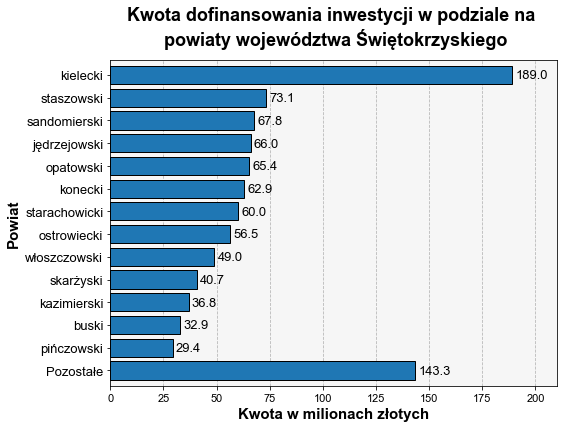

In [8]:
fig = plt.figure(figsize=[8,6])
ax = fig.add_subplot()

FF = "arial"
bar = ax.barh(y=df["Powiat"], width=df["Kwota"], zorder=2, edgecolor="black")
plt.title("Kwota dofinansowania inwestycji w podziale na \n powiaty województwa Świętokrzyskiego", fontsize=18, pad=15,
         fontfamily=FF, weight="bold")
plt.ylabel("Powiat", fontsize=15, fontfamily=FF, weight="bold")
plt.xlabel("Kwota w milionach złotych", fontsize=15, fontfamily=FF, weight="bold")
plt.xticks(fontsize=11, fontfamily=FF)
plt.yticks(fontsize=13, fontfamily=FF)
plt.margins(0.02, 0.02)
plt.xlim(0, 210)
ax = plt.gca()
ax.set_facecolor("#F6F6F6")
ax.grid(True, "both", "x", alpha=0.9, ls="--")

for i, rect in enumerate(bar):
    plt.text(rect.get_x() + rect.get_width() + 1.5, rect.get_y() + 1/4 * rect.get_height() + 0.05, df.iloc[i, 1], fontsize=13,
            fontfamily=FF)

plt.show()

Uważam, że powyższy wykres jest lepszy od obu poprzednich ponieważ:
- poprawia wszystkie błędy związane z czytelnością, które poprawione zostały już w wykresie zrobionym w ggplot2
- jest bardziej czytelny niż poprzedni wykres ze względu na zwiększenie czcionki
- zawiera również dokładne wartości, tak jak wykres niepoprawiony, jeśli czytelnik jest nimi zainteresowany